In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (20,10)

In [3]:
serial = pd.read_csv('serial.csv', names=['1','2','3','convolution','6'])
parallel2 = pd.read_csv('parallel_results_cluster2.csv', names=['1','2','3','convolution','6'])
parallel4 = pd.read_csv('parallel_results_cluster4.csv', names=['1','2','3','convolution','6'])
parallel_2 = pd.read_csv('parallel_without_for_results_cluster2.csv', names=['1','2','3','convolution','6'])
parallel_4 = pd.read_csv('parallel_without_for_results_cluster4.csv', names=['1','2','3','convolution','6'])

In [4]:
df = serial.copy()
df['execution'] = 'serial'
df = df.append(parallel2, sort=False)
df.fillna('parallel_execution_2_threads',inplace=True)
df = df.append(parallel4, sort=False)
df.fillna('parallel_execution_4_threads',inplace=True)
df = df.append(parallel_2, sort=False)
df.fillna('parallel_execution_2_threads_without_for',inplace=True)
df = df.append(parallel_4, sort=False)
df.fillna('parallel_execution_4_threads_without_for',inplace=True)
df = df[['execution', 'convolution']]

Text(0,0.5,'Time to end the convolution')

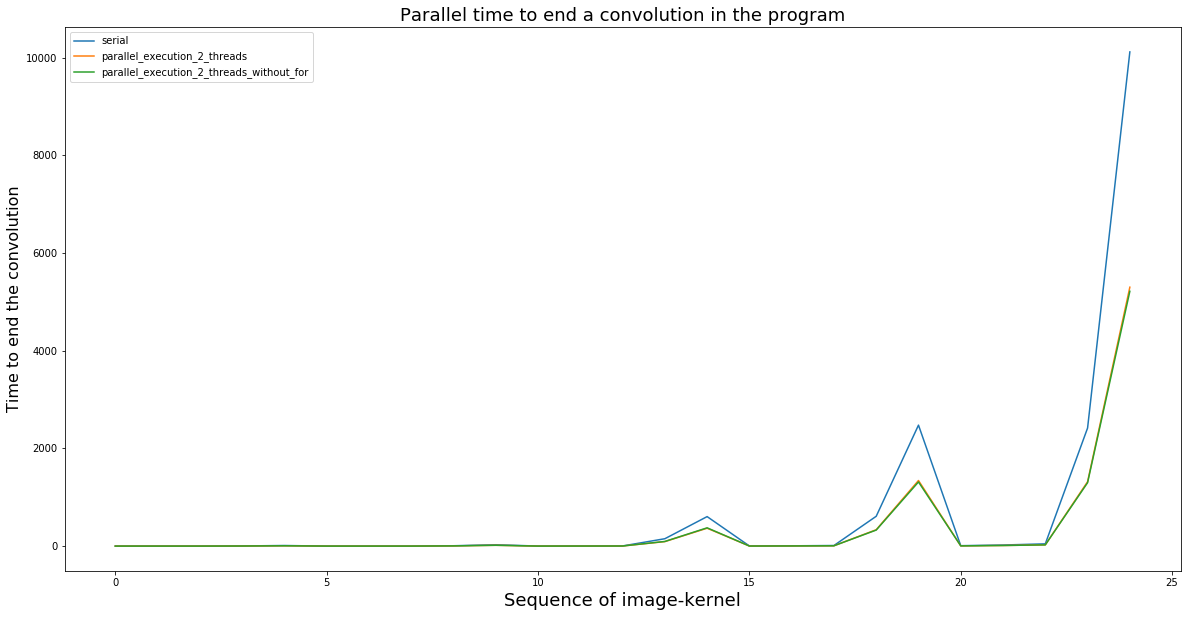

In [5]:
for ex_type in ['serial', 'parallel_execution_2_threads', 'parallel_execution_2_threads_without_for']:
    plt.plot(df.loc[df.execution==ex_type].convolution, label=ex_type)
plt.legend(loc='upper left')
plt.title("Parallel time to end a convolution in the program", fontsize=18)
plt.xlabel('Sequence of image-kernel', fontsize=18)
plt.ylabel('Time to end the convolution', fontsize=16)

Text(0,0.5,'Time to end the convolution')

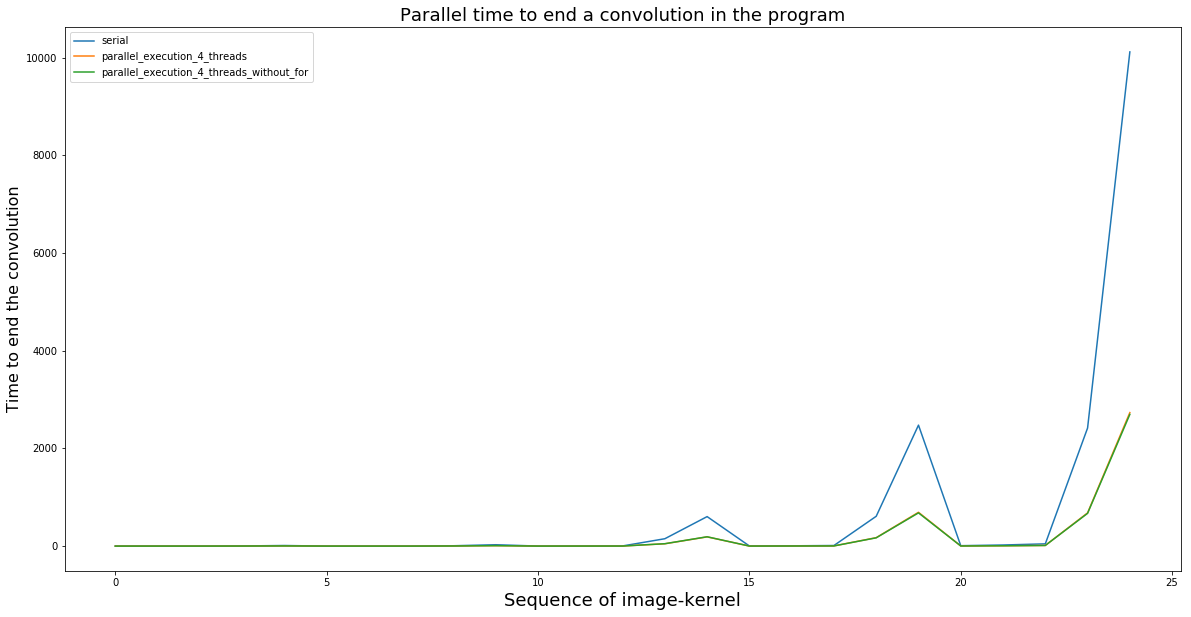

In [6]:
for ex_type in ['serial', 'parallel_execution_4_threads', 'parallel_execution_4_threads_without_for']:
    plt.plot(df.loc[df.execution==ex_type].convolution, label=ex_type)
plt.legend(loc='upper left')
plt.title("Parallel time to end a convolution in the program", fontsize=18)
plt.xlabel('Sequence of image-kernel', fontsize=18)
plt.ylabel('Time to end the convolution', fontsize=16)

In [8]:
# serial / parallel
df['speedup'] = 0
for ex_type in df.execution.unique():
    df.loc[df.execution==ex_type,'speedup'] = df.loc[df.execution=='serial', 'convolution'] / df.loc[df.execution==ex_type, 'convolution']

Text(0,0.5,'Speedup of the convolution')

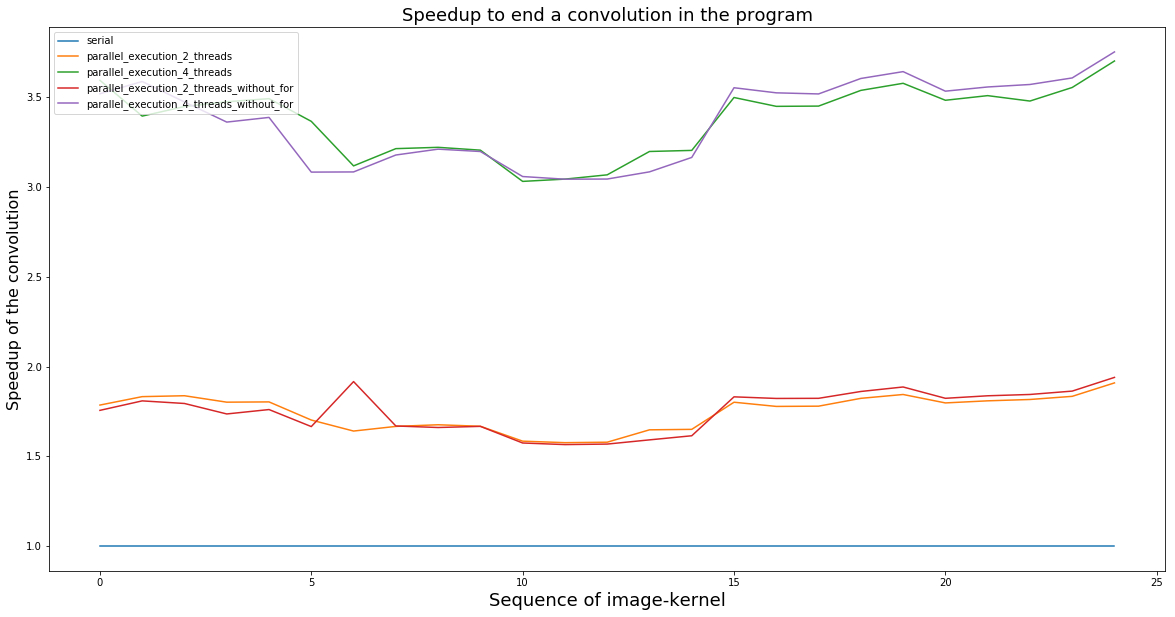

In [11]:
for ex_type in df.execution.unique():
    plt.plot(df.loc[df.execution==ex_type].speedup, label=ex_type)
plt.legend(loc='upper left')
plt.title("Speedup to end a convolution in the program", fontsize=18)
plt.xlabel('Sequence of image-kernel', fontsize=18)
plt.ylabel('Speedup of the convolution', fontsize=16)